In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
def nome_cols(df):
    df.rename(columns = {"nu_anoing_aln":"Periodo Vest",
                     "nu_matric_aln":"Matricula",
                     "nu_cpf_aln":"CPF",
                     "cd_sexo_sex":"Sexo",
                     "nm_nacional_pai":"Nacionalidade",
                     "Naturalidade":"Naturalidade Pai",
                     "cd_unifed_ufe":"Estado",
                     "cd_curso_cur":"Curso",
                     "cd_centro_cen":"Centro",
                     "dc_turno_tur":"Turno",
                     "nu_vestpontost_aln" :"Pontos Vest",
                     "nu_anoIngressoVest_aln":"Ano Vest",
                     "nu_anosg_aln":"Ano Form Colegio",
                     "nm_escolasg_aln":"Colegio EM",
                     "EnsinoMedio":"Cidade EM",
                     "cd_unifed_ufe.1":"Estado EM",
                     "Dt.Nascto":"Data Nasc",
                     "IdadeVestibular":"Idade Vest",
                     "dc_raca_rac":"Etnia",
                     "dc_ingresso_ing":"Forma de Ingresso",
                     "fl_professorEad_aln":"Ead",
                     "dc_categoriaEad_cae":"Categoria de Ingresso",
                     "nu_semestremax_cha":"SemestreMax",
                     "nu_sem_hst":"Semestre Historico",
                     "cd_disciplina_dis":"Disciplina",
                     "nu_nota_tpn":'Nota',
                     "nu_ha_hst":"Horas Aula",
                     "cd_frequencia_frq":"Frequencia",
                     "cd_tipodiscurriculo_tdc":"TipoCurriculo",
                     "cd_revalida_rev":"Revalida",
                     "cd_turma_hst":"Turma",
                     "nu_matric_pss":"Matricula Professor",
                     "nu_SIAPE_pss":"SIAPE Professor",
                     "nm_funcionario_pss":"Nome Professor",
                     "cd_situacao_sta":"Situacao Aluno num",
                     "dc_situacao_sta":"Situacao Aluno",
                     "cd_categoriaEad_cae":"Ead cae",
                     "fl_professorEad_aln.1":"Professor Ead",
                     "nm_curso_cur":"Nome Curso"},
          inplace=True)

In [26]:
df_ini_1 = pd.read_csv("Dados CTC (2ª leva) - 2000-2005.csv",low_memory=False)
df_ini_2 = pd.read_csv("Dados CTC (2ª leva) - 2006-2010.csv",low_memory=False)
df_ini_3 = pd.read_csv("Dados CTC (2ª leva) - 2011-2015.csv",low_memory=False)
df_ini_4 = pd.read_csv("Dados CTC (2ª leva) - 2016-2019.csv",low_memory=False)

#Juntar dfs
nome_cols(df_ini_1)
nome_cols(df_ini_2)
nome_cols(df_ini_3)
nome_cols(df_ini_4)

df = pd.concat([df_ini_1,df_ini_2,df_ini_3,df_ini_4])

In [27]:
#Linhas repetidas
df.drop_duplicates(subset=['Matricula','Semestre Historico','Disciplina'],inplace=True)

df = df[df['Revalida'].isna()]

df = df[df['Horas Aula']!=0]
df = df[~df['Disciplina'].str.contains('ZZ')]
lis = ['TRA0000','GCN7999','GCN7999','EFC5570','EPS5247','INE5462','ECV5724','INE5463','CMA6413','ECV5706','INE5674',
       'INE5676','INE5462','ENS5504','EEL7700','EEL7703','EEL7800','ENS5503','ECV5723','EEL7701','EQA5803','EEL7702',
       'ARQ5708','EEL7704','INE5461','INE5678','ARQ5703','ARQ5704','ARQ5709','EQA5802','INE5671','INE5672','ECV5721',
       'ECV5722','ARQ5702','ARQ5706','EQA5801']
for i in lis:
    df = df[df['Disciplina'] != i]

x = df.groupby('Matricula')['Matricula'].count().to_frame()
x.rename(columns={'Matricula':'Materias'},inplace=True)
x = x[x['Materias'] <= 3]
lis = x.reset_index()['Matricula'].unique()

df = df[~df['Matricula'].isin(lis)]

df['Sexo'] = df['Sexo'].apply(lambda x: "M" if x == 'm' else x)
df['Sexo'] = df['Sexo'].apply(lambda x: "F" if x == 'f' else x)

df['Situacao Aluno'] = df['Situacao Aluno'].apply(lambda x: "formado" if x == 'concluinte' else x)
df['Situacao Aluno'] = df['Situacao Aluno'].apply(lambda x: "abandono" if x == 'desistência' else x)
df['Situacao Aluno'] = df['Situacao Aluno'].apply(lambda x: "abandono" if x == 'jubilado' else x)
df['Situacao Aluno'] = df['Situacao Aluno'].apply(lambda x: "abandono" if x == 'eliminado/cancelado' else x)
df['Situacao Aluno'] = df['Situacao Aluno'].apply(lambda x: "abandono" if x == 'falecido' else x)
df['Situacao Aluno'] = df['Situacao Aluno'].apply(lambda x: "abandono" if x == 'transferido' else x)
df['Situacao Aluno'] = df['Situacao Aluno'].apply(lambda x: "abandono" if x == 'troca de curso' else x)
df['Situacao Aluno'] = df['Situacao Aluno'].apply(lambda x: "regular" if x == 'classificado vestibular' else x)
df['Situacao Aluno'] = df['Situacao Aluno'].apply(lambda x: "regular" if x == 'trancado' else x)

df['TipoCurriculo'] = df['TipoCurriculo'].apply(lambda x:'Ob' if x == 'ob' else x )
df['TipoCurriculo'] = df['TipoCurriculo'].apply(lambda x:'Ex' if x == 'EX' else x )
df['TipoCurriculo'] = df['TipoCurriculo'].apply(lambda x:'Ex' if x == 'Es' else x )
df['TipoCurriculo'] = df['TipoCurriculo'].apply(lambda x:'Op' if x == 'op' else x )
df['TipoCurriculo'] = df['TipoCurriculo'].apply(lambda x:'Ob' if x == ' ' else x )

df = df[df['TipoCurriculo'] != 'Ex']

In [28]:
#Repeticao de materia
df['Aprovado'] = df['Nota']
df['Aprovado'] = df['Aprovado'].apply(lambda x: 1 if x > 5.75 else 0)
df['vez'] = df.groupby(['Matricula', 'Disciplina'])['Semestre Historico'].cumcount()

#Agrupamento dentro de coluna
def Grupo(df,col,nome_grupo,lista):
    for i in lista:
        df[col] = df[col].apply(lambda x: nome_grupo if x == i else x)
        
#Regiao
Grupo(df,'Estado EM','SU',['SC','RS','PR'])
Grupo(df,'Estado EM','NE',['MA','PI','BA','PE','CE','RN','AL','SE','PB'])
Grupo(df,'Estado EM','SE',['SP','RJ','MG','ES'])
Grupo(df,'Estado EM','CO',['MT','MS','GO','DF'])
Grupo(df,'Estado EM','NO',['AM','AC','AP','PA','TO','RR','RO'])

#Idade
#df['Idade Vest'] = df['Idade Vest'].apply(lambda x: 31 if x >30 else x)
#df['Idade Vest'] = df['Idade Vest'].apply(lambda x: 25 if 22<=x<31 else x)
#df['Idade Vest'] = df['Idade Vest'].apply(lambda x: 18 if x<22 else x)

#Contagem de Disciplinas
m = df.groupby(['Matricula','Semestre Historico'])['Disciplina'].count().rename('Cont Disc')
df = df.set_index(['Matricula','Semestre Historico']).join(m).reset_index()

#Contagem de Matriculas
#m = df.groupby(['CPF'])['Matricula'].count().rename('Cont Matric')
#df = df.set_index(['Matricula']).join(m).reset_index()

#x = df.groupby(['Matricula']).agg({'CPF':'first'}).reset_index().dropna()
#m = x.groupby(['CPF']).agg({'Matricula':'count'})


df.drop(['Ead','Ead cae','Forma de Ingresso','Centro','Nacionalidade',
         'Naturalidade Pai','Turno','Colegio EM','Data Nasc','Estado','Cidade EM','Ano Form Colegio',
         'SemestreMax','Professor Ead','SIAPE Professor','Nome Professor', 'Situacao Aluno num'],axis=1,inplace=True)


In [29]:
df['Sexo'] = df['Sexo'].apply(lambda x: "M" if x == 'm' else x)
df['Sexo'] = df['Sexo'].apply(lambda x: "F" if x == 'f' else x)

df['Situacao Aluno'] = df['Situacao Aluno'].apply(lambda x: "formado" if x == 'concluinte' else x)
df['Situacao Aluno'] = df['Situacao Aluno'].apply(lambda x: "abandono" if x == 'desistência' else x)
df['Situacao Aluno'] = df['Situacao Aluno'].apply(lambda x: "abandono" if x == 'jubilado' else x)
df['Situacao Aluno'] = df['Situacao Aluno'].apply(lambda x: "abandono" if x == 'eliminado/cancelado' else x)
df['Situacao Aluno'] = df['Situacao Aluno'].apply(lambda x: "abandono" if x == 'falecido' else x)
df['Situacao Aluno'] = df['Situacao Aluno'].apply(lambda x: "abandono" if x == 'transferido' else x)
df['Situacao Aluno'] = df['Situacao Aluno'].apply(lambda x: "abandono" if x == 'troca de curso' else x)
df['Situacao Aluno'] = df['Situacao Aluno'].apply(lambda x: "regular" if x == 'classificado vestibular' else x)
df['Situacao Aluno'] = df['Situacao Aluno'].apply(lambda x: "regular" if x == 'trancado' else x)

df['TipoCurriculo'] = df['TipoCurriculo'].apply(lambda x:'Ob' if x == 'ob' else x )
df['TipoCurriculo'] = df['TipoCurriculo'].apply(lambda x:'Ex' if x == 'EX' else x )
df['TipoCurriculo'] = df['TipoCurriculo'].apply(lambda x:'Ex' if x == 'Es' else x )
df['TipoCurriculo'] = df['TipoCurriculo'].apply(lambda x:'Op' if x == 'op' else x )
df['TipoCurriculo'] = df['TipoCurriculo'].apply(lambda x:'Ob' if x == ' ' else x )

In [30]:
m1 = pd.DataFrame(columns=df.columns)

lis = df['Semestre Historico'].sort_values().unique()

for i in range(len(lis[:-1])):
    df2 = df[df['Semestre Historico'] <= lis[i]]
    
    t = df2.sort_values('Semestre Historico').groupby('Disciplina').agg({'Aprovado':'mean','Semestre Historico':'last'})

    t.reset_index(inplace=True)
    t.rename(columns={"Aprovado": "Aprov Disc"},inplace=True)
    t = t[t['Semestre Historico'] == lis[i]]
    t['Semestre Historico'] = lis[i]
    t.set_index(['Disciplina','Semestre Historico'],inplace=True)

    m1.set_index(['Disciplina','Semestre Historico'],inplace=True)
    m1 = pd.concat([m1,t])
    m1.reset_index(inplace=True)
    
m1.set_index(['Disciplina','Semestre Historico'],inplace=True)
df.set_index(['Disciplina','Semestre Historico'],inplace=True)
m1.drop(['Matricula', 'Periodo Vest', 'CPF',
       'Sexo', 'Nome Curso', 'Pontos Vest', 'Ano Vest', 'Idade Vest', 'Etnia','Situacao Aluno',
       'Categoria de Ingresso', 'Nota', 'Horas Aula', 'Frequencia','Revalida','Curso','Turma','Estado EM',
       'TipoCurriculo', 'Matricula Professor', 'Aprovado', 'vez', 'Cont Disc'],axis=1,inplace=True)

df = df.merge(m1,how='left',left_index=True,right_index=True)
df.reset_index(inplace=True)

In [31]:
m1 = pd.DataFrame(columns=df.columns)

lis = df['Semestre Historico'].sort_values().unique()

for i in range(len(lis[:-1])):
    df2 = df[df['Semestre Historico'] <= lis[i]]
    
    t = df2.sort_values('Semestre Historico').groupby('Matricula').agg({'Aprovado':'mean','Semestre Historico':'last'})
    
    t.reset_index(inplace=True)
    t.rename(columns={"Aprovado": "Aprov Aluno"},inplace=True)
    t = t[t['Semestre Historico'] == lis[i]]
    t['Semestre Historico'] = lis[i]
    t.set_index(['Matricula','Semestre Historico'],inplace=True)

    m1.set_index(['Matricula','Semestre Historico'],inplace=True)
    m1 = pd.concat([m1,t])
    m1.reset_index(inplace=True)
    
m1.set_index(['Matricula','Semestre Historico'],inplace=True)
df.set_index(['Matricula','Semestre Historico'],inplace=True)
m1.drop(['Disciplina', 'Periodo Vest', 'CPF',
       'Sexo', 'Nome Curso', 'Pontos Vest', 'Ano Vest', 'Idade Vest', 'Etnia','Situacao Aluno',
       'Categoria de Ingresso', 'Nota', 'Horas Aula', 'Frequencia','Revalida','Curso','Turma','Estado EM',
       'TipoCurriculo', 'Matricula Professor', 'Aprovado', 'vez', 'Cont Disc','Aprov Disc'],axis=1,inplace=True)

df = df.merge(m1,how='left',left_index=True,right_index=True)
df.reset_index(inplace=True)

In [32]:
m1 = pd.DataFrame(columns=df.columns)

lis = df['Semestre Historico'].sort_values().unique()

for i in range(len(lis[:-1])):
    df2 = df[df['Semestre Historico'] <= lis[i]]
    
    t = df2.sort_values('Semestre Historico').groupby(['Matricula Professor','Disciplina']).agg({'Aprovado':'mean','Semestre Historico':'last'})
    
    t.reset_index(inplace=True)
    t.rename(columns={"Aprovado": "Aprov Prof"},inplace=True)
    t = t[t['Semestre Historico'] == lis[i]]
    t['Semestre Historico'] = lis[i]   
    t.set_index(['Matricula Professor','Disciplina','Semestre Historico'],inplace=True)
    


    m1.set_index(['Matricula Professor','Disciplina','Semestre Historico'],inplace=True)
    m1 = pd.concat([m1,t])
    m1.reset_index(inplace=True)
    
m1.set_index(['Matricula Professor','Disciplina','Semestre Historico'],inplace=True)
df.set_index(['Matricula Professor','Disciplina','Semestre Historico'],inplace=True)
m1.drop(['Matricula', 'Periodo Vest', 'CPF',
       'Sexo', 'Nome Curso', 'Pontos Vest', 'Ano Vest', 'Idade Vest', 'Etnia','Situacao Aluno',
       'Categoria de Ingresso', 'Nota', 'Horas Aula', 'Frequencia','Revalida','Curso','Turma','Estado EM',
       'TipoCurriculo', 'Aprovado', 'vez', 'Cont Disc','Aprov Disc','Aprov Aluno'],axis=1,inplace=True)

df = df.merge(m1,how='left',left_index=True,right_index=True)
df.reset_index(inplace=True)

In [33]:
m1 = pd.DataFrame(columns=df.columns)

lis = df['Semestre Historico'].sort_values().unique()

for i in range(len(lis[:-1])):
    df2 = df[df['Semestre Historico'] <= lis[i]]
    df2 = df2[df2['Semestre Historico'] >= lis[i-2]]
                     
        
    t = df2.sort_values('Semestre Historico').groupby('Matricula').agg({'Aprovado':'mean','Semestre Historico':'last'})
    
    t.reset_index(inplace=True)
    t.rename(columns={"Aprovado": "Aprov -3"},inplace=True)
    t = t[t['Semestre Historico'] == lis[i]]
    t['Semestre Historico'] = lis[i]
    t.set_index(['Matricula','Semestre Historico'],inplace=True)

    m1.set_index(['Matricula','Semestre Historico'],inplace=True)
    m1 = pd.concat([m1,t])
    m1.reset_index(inplace=True)
    
m1.set_index(['Matricula','Semestre Historico'],inplace=True)
df.set_index(['Matricula','Semestre Historico'],inplace=True)
m1.drop(['Disciplina', 'Periodo Vest', 'CPF',
       'Sexo', 'Nome Curso', 'Pontos Vest', 'Ano Vest', 'Idade Vest', 'Etnia','Situacao Aluno',
       'Categoria de Ingresso', 'Nota', 'Horas Aula', 'Frequencia','Revalida','Curso','Turma','Estado EM',
       'TipoCurriculo', 'Matricula Professor', 'Aprovado', 'vez', 'Cont Disc','Aprov Disc','Aprov Aluno','Aprov Prof'],axis=1,inplace=True)

df = df.merge(m1,how='left',left_index=True,right_index=True)
df.reset_index(inplace=True)

In [34]:
m1 = pd.DataFrame(columns=df.columns)

lis = df['Semestre Historico'].sort_values().unique()

for i in range(len(lis[:-1])):
    df2 = df[df['Semestre Historico'] <= lis[i]]
    df2 = df2[df2['Semestre Historico'] >= lis[i]]
                     
        
    t = df2.sort_values('Semestre Historico').groupby('Matricula').agg({'Aprovado':'mean','Semestre Historico':'last'})
    
    t.reset_index(inplace=True)
    t.rename(columns={"Aprovado": "Aprov -1"},inplace=True)
    t = t[t['Semestre Historico'] == lis[i]]
    t['Semestre Historico'] = lis[i]
    t.set_index(['Matricula','Semestre Historico'],inplace=True)

    m1.set_index(['Matricula','Semestre Historico'],inplace=True)
    m1 = pd.concat([m1,t])
    m1.reset_index(inplace=True)
    
m1.set_index(['Matricula','Semestre Historico'],inplace=True)
df.set_index(['Matricula','Semestre Historico'],inplace=True)
m1.drop(['Disciplina', 'Periodo Vest', 'CPF',
       'Sexo', 'Nome Curso', 'Pontos Vest', 'Ano Vest', 'Idade Vest', 'Etnia','Situacao Aluno',
       'Categoria de Ingresso', 'Nota', 'Horas Aula', 'Frequencia','Revalida','Curso','Turma','Estado EM',
       'TipoCurriculo', 'Matricula Professor', 'Aprovado', 'vez', 'Cont Disc','Aprov Disc','Aprov Aluno','Aprov Prof','Aprov -3'],axis=1,inplace=True)

df = df.merge(m1,how='left',left_index=True,right_index=True)
df.reset_index(inplace=True)

In [35]:
m1 = pd.DataFrame(columns=df.columns)

lis = df['Semestre Historico'].sort_values().unique()

for i in range(len(lis[:-1])):
    df2 = df[df['Semestre Historico'] <= lis[i]]
    df2 = df2[df2['Semestre Historico'] >= lis[i]]
                     
        
    t = df2.groupby(['Matricula']).apply(lambda dfx: (dfx['Nota'] * dfx["Horas Aula"]).sum() / dfx["Horas Aula"].sum())
    x = t.to_frame()
    x.columns=['IAA Sem']
    x['Semestre Historico'] = lis[i]
    x.reset_index(inplace=True)
    x.set_index(['Matricula','Semestre Historico'],inplace=True)

    m1.set_index(['Matricula','Semestre Historico'],inplace=True)
    m1 = pd.concat([m1,x])
    m1.reset_index(inplace=True)
    
m1.set_index(['Matricula','Semestre Historico'],inplace=True)
df.set_index(['Matricula','Semestre Historico'],inplace=True)
m1.drop(['Disciplina', 'Periodo Vest', 'CPF',
       'Sexo', 'Nome Curso', 'Pontos Vest', 'Ano Vest', 'Idade Vest', 'Etnia','Situacao Aluno',
       'Categoria de Ingresso', 'Nota', 'Horas Aula', 'Frequencia','Revalida','Curso','Turma','Estado EM',
       'TipoCurriculo', 'Matricula Professor', 'Aprovado', 'vez', 'Cont Disc','Aprov Disc',
        'Aprov Aluno','Aprov Prof','Aprov -3','Aprov -1'],axis=1,inplace=True)

df = df.merge(m1,how='left',left_index=True,right_index=True)
df.reset_index(inplace=True)

In [36]:
m1 = pd.DataFrame(columns=df.columns)

lis = df['Semestre Historico'].sort_values().unique()

for i in range(len(lis[:-1])):
    df2 = df[df['Semestre Historico'] <= lis[i]]
                     
        
    t = df2.groupby(['Matricula']).apply(lambda dfx: (dfx['Nota'] * dfx["Horas Aula"]).sum() / dfx["Horas Aula"].sum())
    x = t.to_frame()
    x.columns=['IAA Hist Sem']
    x['Semestre Historico'] = lis[i]
    x.reset_index(inplace=True)
    x.set_index(['Matricula','Semestre Historico'],inplace=True)

    m1.set_index(['Matricula','Semestre Historico'],inplace=True)
    m1 = pd.concat([m1,x])
    m1.reset_index(inplace=True)
    
m1.set_index(['Matricula','Semestre Historico'],inplace=True)
df.set_index(['Matricula','Semestre Historico'],inplace=True)
m1.drop(['Disciplina', 'Periodo Vest', 'CPF',
       'Sexo', 'Nome Curso', 'Pontos Vest', 'Ano Vest', 'Idade Vest', 'Etnia','Situacao Aluno',
       'Categoria de Ingresso', 'Nota', 'Horas Aula', 'Frequencia','Revalida','Curso','Turma','Estado EM',
       'TipoCurriculo', 'Matricula Professor', 'Aprovado', 'vez', 'Cont Disc','Aprov Disc',
        'Aprov Aluno','Aprov Prof','Aprov -3','Aprov -1','IAA Sem'],axis=1,inplace=True)

df = df.merge(m1,how='left',left_index=True,right_index=True)
df.reset_index(inplace=True)

# Análise descritiva

### Geral

In [15]:
df.groupby('Matricula').agg({'Matricula':'first'}).count()

Matricula    25110
dtype: int64

In [17]:
df.groupby(['Matricula']).agg({'Matricula':'first','Aprovado':'mean','IAA Hist Sem':'last'})['Aprovado'].mean()

0.7595151786454463

In [ ]:
df.groupby(['Matricula']).agg({'Matricula':'first','Aprovado':'mean','IAA Hist Sem':'last'})['Situacao Aluno'].value_counts()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


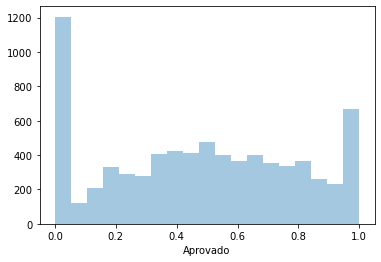

In [16]:
g = sns.distplot(df[df['Situacao Aluno'] == 'abandono'].groupby('Matricula').agg({'Matricula':'first','Aprovado':'mean','Situacao Aluno':'last'})['Aprovado'],kde=False)


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histograma Aprovação média')

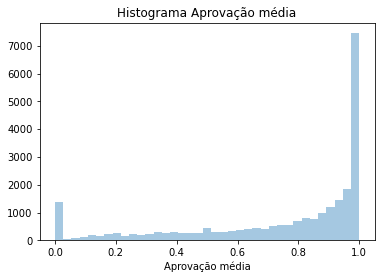

In [17]:
#Histogramas
#g = sns.distplot(df[df['Situacao Aluno'] == 'abandono'].groupby(['Matricula']).agg({'Matricula':'first','Aprovado':'mean','IAA Hist Sem':'last'})['IAA Hist Sem'],kde=False)
g = sns.distplot(df.groupby(['Matricula']).agg({'Matricula':'first','Aprovado':'mean','IAA Hist Sem':'last'})['Aprovado'],kde=False)
#Boxplots
#x = df.groupby(['Matricula']).agg({'Matricula':'first','Aprovado':'mean','IAA Hist Sem':'last','Situacao Aluno':'last'})
#g = sns.boxplot(x = x['Situacao Aluno'],y = x['IAA Hist Sem'])

plt.xlabel('Aprovação média')
#plt.ylabel('IAA Final')
plt.title('Histograma Aprovação média')
#g.set_xticklabels(g.get_xticklabels(),rotation=90)

Text(0.5, 1.0, 'Boxplot de média de aprovação')

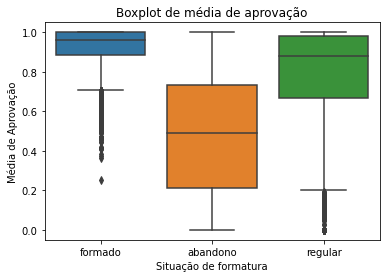

In [130]:
#g = sns.distplot(df.groupby(['Matricula']).agg({'Matricula':'first','Aprovado':'mean','IAA Hist Sem':'last'})['Aprovado'],kde=False)
#g = sns.distplot(df[df['Situacao Aluno'] == 'formado'].groupby(['Matricula']).agg({'Matricula':'first','Aprovado':'mean','IAA Hist Sem':'last'})['Aprovado'],kde=False)


x = df[df['Revalida'].isna()].groupby(['Matricula']).agg({'Matricula':'first','Aprovado':'mean','IAA Hist Sem':'last','Situacao Aluno':'last'})
g = sns.boxplot(x = x['Situacao Aluno'],y = x['Aprovado'])

plt.xlabel('Situação de formatura')
plt.ylabel('Média de Aprovação')
plt.title('Boxplot de média de aprovação')

### Gênero

In [146]:
df[df['Sexo'] == 'M'].groupby('Matricula').agg({'Matricula':'first'}).count()

Matricula    18399
dtype: int64

In [145]:
df[df['Sexo'] == 'M'].groupby(['Matricula']).agg({'Matricula':'first','Aprovado':'mean','IAA Hist Sem':'last','Situacao Aluno':'last'})['Situacao Aluno'].value_counts()

formado     8673
abandono    5801
regular     3925
Name: Situacao Aluno, dtype: int64

In [154]:
df[df['Sexo'] == 'F'].groupby(['Matricula']).agg({'Matricula':'first','Aprovado':'mean','IAA Hist Sem':'last'})['IAA Hist Sem'].mean()

6.6556160589284605

Text(0.5, 1.0, 'Boxplot de Aprovação média por gênero')

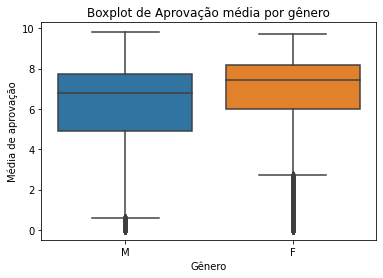

In [84]:
#Histogramas
#g = sns.distplot(df[df['Sexo'] == 'M'].groupby(['Matricula']).agg({'Matricula':'first','Aprovado':'mean','IAA Hist Sem':'last'})['Aprovado'],kde=False)
#g = sns.distplot(df.groupby(['Matricula']).agg({'Matricula':'first','Aprovado':'mean','IAA Hist Sem':'last'})['IAA Hist Sem'],kde=False)
#Boxplots
x = df.groupby(['Matricula']).agg({'Matricula':'first','Aprovado':'mean','IAA Hist Sem':'last','Sexo':'last'})
g = sns.boxplot(x = x['Sexo'],y = x['IAA Hist Sem'])

plt.xlabel('Gênero')
plt.ylabel('Média de aprovação')
plt.title('Boxplot de Aprovação média por gênero')
#g.set_xticklabels(g.get_xticklabels(),rotation=90)

### Etnia

In [73]:
df[df['Etnia']=='não declarada'].groupby('Matricula').agg({'Matricula':'first'}).count()

Matricula    23
dtype: int64

In [74]:
df[df['Etnia']=='parda'].groupby(['Matricula']).agg({'Matricula':'first','Aprovado':'mean','IAA Hist Sem':'last','Situacao Aluno':'last'})['Situacao Aluno'].value_counts()

regular     21
abandono     2
Name: Situacao Aluno, dtype: int64

In [33]:
x = df.groupby(['Matricula']).agg({'Matricula':'first','Etnia':'first','Aprovado':'mean','IAA Hist Sem':'last'})
x[x['Etnia']=='parda']['Aprovado'].mean()

0.634142277828733

Text(0.5, 1.0, 'Boxplot de IAA - Etnia')

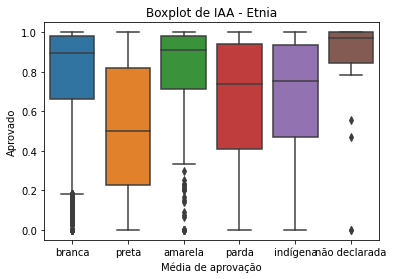

In [39]:
#Histogramas
#g = sns.distplot(df[df['Sexo'] == 'F'].groupby(['Matricula']).agg({'Matricula':'first','Aprovado':'mean','IAA Hist Sem':'last'})['IAA Hist Sem'],kde=False)
#g = sns.distplot(df.groupby(['Matricula']).agg({'Matricula':'first','Aprovado':'mean','IAA Hist Sem':'last'})['IAA Hist Sem'],kde=False)
#Boxplots
x = df.groupby(['Matricula']).agg({'Matricula':'first','Aprovado':'mean','IAA Hist Sem':'last','Etnia':'last'})
g = sns.boxplot(x = x['Etnia'],y = x['IAA Hist Sem'])

#g = sns.distplot(df[df['Etnia'] == 'amarela'].groupby(['Matricula']).agg({'Matricula':'first','Aprovado':'mean','IAA Hist Sem':'last'})['IAA Hist Sem'],kde=False)

plt.xlabel('IAA Final')
#plt.ylabel('IAA Final')
plt.title('Boxplot de IAA - Etnia')
#g.set_xticklabels(g.get_xticklabels(),rotation=90)

Text(0.5, 1.0, 'Histograma de IAA - etnia amarela')

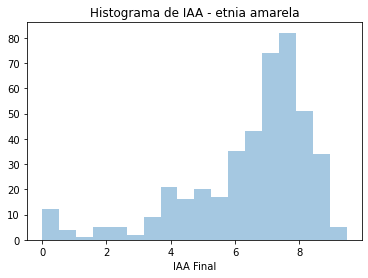

In [36]:
#Histogramas
g = sns.distplot(df[df['Etnia'] == 'amarela'].groupby(['Matricula']).agg({'Matricula':'first','Aprovado':'mean','IAA Hist Sem':'last'})['IAA Hist Sem'],kde=False)
#g = sns.distplot(df.groupby(['Matricula']).agg({'Matricula':'first','Aprovado':'mean','IAA Hist Sem':'last'})['IAA Hist Sem'],kde=False)
#Boxplots
#x = df.groupby(['Matricula']).agg({'Matricula':'first','Aprovado':'mean','IAA Hist Sem':'last','Sexo':'last'})
#g = sns.boxplot(x = x['Sexo'],y = x['IAA Hist Sem'])

plt.xlabel('IAA Final')
#plt.ylabel('IAA Final')
plt.title('Histograma de IAA - etnia amarela')
#g.set_xticklabels(g.get_xticklabels(),rotation=90)

Text(0.5, 1.0, 'Histograma de IAA por etnia - amarela')

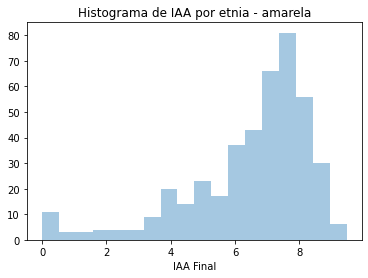

In [39]:
x = df[df['Etnia'] == 'amarela']
#Histogramas
#g = sns.distplot(df[df['Sexo'] == 'F'].groupby(['Matricula']).agg({'Matricula':'first','Aprovado':'mean','IAA Hist Sem':'last'})['IAA Hist Sem'],kde=False)
g = sns.distplot(x.groupby(['Matricula']).agg({'Matricula':'first','Aprovado':'mean','IAA Hist Sem':'last'})['IAA Hist Sem'],kde=False)
#Boxplots
#x = df.groupby(['Matricula']).agg({'Matricula':'first','Aprovado':'mean','IAA Hist Sem':'last','Etnia':'last','Periodo Vest':'first'})
#g = sns.boxplot(x = x['Etnia'],y = x['Aprovado'])

plt.xlabel('IAA Final')
#plt.ylabel('Aprovação média')
plt.title('Histograma de IAA por etnia - amarela')
#g.set_xticklabels(g.get_xticklabels(),rotation=90)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


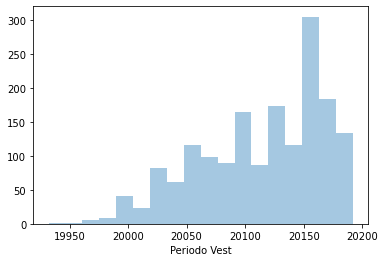

In [22]:
x = df.groupby(['Matricula']).agg({'Matricula':'first','Aprovado':'mean','IAA Hist Sem':'last','Etnia':'last','Periodo Vest':'first'})
g = sns.distplot(x[x['Etnia'] == 'parda']['Periodo Vest'],kde=False)

In [ ]:
x[x['Categoria de Ingresso'] == 'Não']['Etnia'].value_counts()

### Categoria de Ingresso

In [67]:
x = df.groupby(['Matricula']).agg({'Matricula':'first','Aprovado':'mean','IAA Hist Sem':'last','Etnia':'last','Situacao Aluno':'last','Periodo Vest':'first','Categoria de Ingresso':'first'})

x['Categoria de Ingresso'] = x['Categoria de Ingresso'].apply(lambda x:'Não' if x == 'Classificação geral' else x )
x['Categoria de Ingresso'].unique()
for i in lis:
    x['Categoria de Ingresso'] = x['Categoria de Ingresso'].apply(lambda x:'Sim' if x == i else x )
    
x['Categoria de Ingresso'] = x['Categoria de Ingresso'].apply(lambda x:'Sim' if x == 'Sim' else 'Não' )
x = x[x['Periodo Vest']>20080]
x['Categoria de Ingresso'].value_counts()
#df[~df['Matricula'].isin(lis)]

Não    8661
Sim    4337
Name: Categoria de Ingresso, dtype: int64

In [30]:
x[x['Categoria de Ingresso'] == 'Não']['Etnia'].value_counts()

branca           15125
parda              875
amarela            397
preta              176
indígena            31
não declarada       11
Name: Etnia, dtype: int64

In [75]:
x[x['Categoria de Ingresso'] == 'Não']['IAA Hist Sem'].mean()

6.405489859223655

Text(0.5, 1.0, 'Boxplot IAA Final - Categoria de Ingresso')

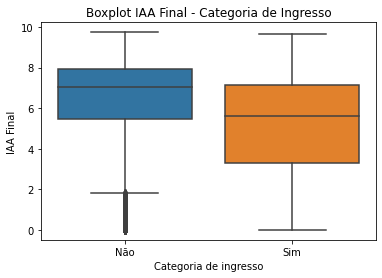

In [77]:
#Histogramas
#g = sns.distplot(x[x['Categoria de Ingresso'] == 'Sim']['IAA Hist Sem'],kde=False)
#Boxplots
#x = df.groupby(['Matricula']).agg({'Matricula':'first','Aprovado':'mean','IAA Hist Sem':'last','Situacao Aluno':'last'})
g = sns.boxplot(x = x['Categoria de Ingresso'],y = x['IAA Hist Sem'])

plt.xlabel('Categoria de ingresso')
plt.ylabel('IAA Final')
plt.title('Boxplot IAA Final - Categoria de Ingresso')
#g.set_xticklabels(g.get_xticklabels(),rotation=90)

Text(0.5, 1.0, 'Histograma aprovação média - Classificação Geral')

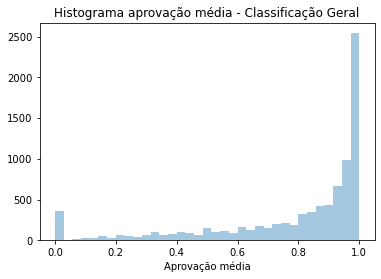

In [80]:
#Histogramas
g = sns.distplot(x[x['Categoria de Ingresso'] == 'Não']['Aprovado'],kde=False)
#Boxplots
#g = sns.boxplot(x = x['Categoria de Ingresso'],y = x['Aprovado'])

plt.xlabel('Aprovação média')
#plt.ylabel('Aprovação média')
plt.title('Histograma aprovação média - Classificação Geral')
#g.set_xticklabels(g.get_xticklabels(),rotation=90)

### Categoria de ingresso X etnia

In [40]:
x = df.groupby(['Matricula']).agg({'Matricula':'first','Aprovado':'mean','IAA Hist Sem':'last','Etnia':'last','Situacao Aluno':'last','Periodo Vest':'first','Categoria de Ingresso':'first'})
x = x[~x['Categoria de Ingresso'].isna()]
x['Categoria de Ingresso'] = x['Categoria de Ingresso'].apply(lambda x:'Não' if x == 'Classificação geral' else x )
lis = ['Escola Pública', 'Negro',
       'Vagas Suplementares - Indígena',
       'PAA - Escola Pública - Renda acima de 1,5 Salários Mínimos - Outros',
       'PAA - Escola Pública - Renda até 1,5 Salário Mínimo - Outros',
       'PAA - Escola Pública - Renda até 1,5 Salário Mínimo - PPI (Pretos, Pardos e Indígenas)',
       'PAA - Escola Pública - Renda acima de 1,5 Salários Mínimos - PPI (Pretos, Pardos e Indígenas)',
       'Vagas Suplementares - Quilombola', 'Vagas Suplementares - Negro',
       'PAA - Escola Pública - Renda acima de 1,5 Salários Mínimos - PPI (Pretos, Pardos e Indígenas) sem deficiência',
       'PAA - Escola Pública - Renda acima de 1,5 Salários Mínimos - Outros sem deficiência',
       'PAA - Escola Pública - Renda até 1,5 Salário Mínimo - Outros sem deficiência',
       'PAA - Escola Pública - Renda até 1,5 Salário Mínimo - PPI (Pretos, Pardos e Indígenas) sem deficiência',
       'PAA - Escola Pública - Renda acima de 1,5 Salários Mínimos - Outros com deficiência',
       'PAA - Escola Pública - Renda acima de 1,5 Salários Mínimos - PPI (Pretos, Pardos e Indígenas) com deficiência',
       'PAA - Escola Pública - Renda até 1,5 Salário Mínimo - Outros com deficiência',
       'PAA - Escola Pública - Renda até 1,5 Salário Mínimo - PPI (Pretos, Pardos e Indígenas) com deficiência']
for i in lis:
    x['Categoria de Ingresso'] = x['Categoria de Ingresso'].apply(lambda x:'Sim' if x == i else x )

In [50]:
x = x[x['Periodo Vest'] > 20080]

In [53]:
#x = df.groupby(['Matricula']).agg({'Matricula':'first','Etnia':'first','Aprovado':'mean','IAA Hist Sem':'last'})
t = x[x['Categoria de Ingresso']=='Sim']
t[t['Etnia']=='parda']['IAA Hist Sem'].mean()

4.384625332312489

In [77]:
x = x[~x['Categoria de Ingresso'].isna()]

In [106]:
#t = x[x['Categoria de Ingresso']=='Sim']['Etnia'].value_counts()
x[x['Etnia'] == 'preta']['Categoria de Ingresso'].value_counts()

Sim    617
Não     70
Name: Categoria de Ingresso, dtype: int64

In [120]:
t = x[x['Categoria de Ingresso']=='Não']
t = t[t['Etnia']=='branca']
print(round(t['Aprovado'].mean(),2),t['IAA Hist Sem'].mean())

0.79 6.428714719549133


In [146]:
t = x[x['Categoria de Ingresso']=='Não']
t = t[t['Etnia']=='parda']
t['Situacao Aluno'].count()

435

In [147]:
t = x[x['Categoria de Ingresso']=='Não']
t = t[t['Etnia']=='parda']
t['Situacao Aluno'].value_counts()

regular     156
abandono    141
formado     138
Name: Situacao Aluno, dtype: int64

In [23]:
df.head()

,Matricula,Semestre Historico,Matricula Professor,Disciplina,Periodo Vest,CPF,Sexo,Curso,Nome Curso,Pontos Vest,...,Situacao Aluno,Aprovado,vez,Cont Disc,Aprov Disc,Aprov Aluno,Aprov Prof,Aprov -3,Aprov -1,IAA Sem
0,130001,20001,19660.0,FSC5101,20001,NaN,M,220,ENGENHARIA DE CONTROLE E AUTOMAÇÃO,6316.0,...,formado,1,0,6,0.693989,1.0,0.816327,NaN,1.0,7.770833
1,130001,20001,32209.0,EGR5604,20001,NaN,M,220,ENGENHARIA DE CONTROLE E AUTOMAÇÃO,6316.0,...,formado,1,0,6,0.890625,1.0,1.000000,NaN,1.0,7.770833
2,130001,20001,32870.0,MTM5221,20001,NaN,M,220,ENGENHARIA DE CONTROLE E AUTOMAÇÃO,6316.0,...,formado,1,0,6,0.909091,1.0,0.909091,NaN,1.0,7.770833
3,130001,20001,81951.0,DAS5411,20001,NaN,M,220,ENGENHARIA DE CONTROLE E AUTOMAÇÃO,6316.0,...,formado,1,0,6,1.000000,1.0,1.000000,NaN,1.0,7.770833
4,130001,20001,98021.0,MTM5161,20001,NaN,M,220,ENGENHARIA DE CONTROLE E AUTOMAÇÃO,6316.0,...,formado,1,0,6,0.576642,1.0,0.785714,NaN,1.0,7.770833


Text(0.5, 1.0, 'Boxplot de IAA Final - Categoria de ingresso amarelos')

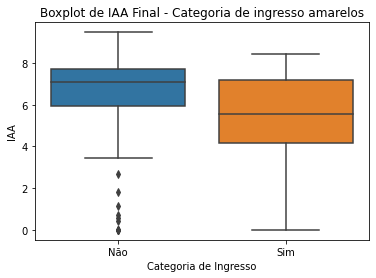

In [45]:
#x = df.groupby(['Matricula']).agg({'Matricula':'first','Aprovado':'mean','IAA Hist Sem':'last','Etnia':'last','Situacao Aluno':'last','Periodo Vest':'first','Categoria de Ingresso':'first'})
t = x[x['Etnia']=='amarela']
#t = x[x['Categoria de Ingresso']=='Não']
#t = t[t['Etnia']=='branca']

#Histogramas
#g = sns.distplot(t[t['Categoria de Ingresso'] == 'Não']['IAA Hist Sem'],kde=False)
#Boxplots
#x = df.groupby(['Matricula']).agg({'Matricula':'first','Aprovado':'mean','IAA Hist Sem':'last','Situacao Aluno':'last'})
g = sns.boxplot(x = t['Categoria de Ingresso'],y = t['IAA Hist Sem'])

plt.xlabel('Categoria de Ingresso')
plt.ylabel('IAA')
plt.title('Boxplot de IAA Final - Categoria de ingresso amarelos')
#g.set_xticklabels(g.get_xticklabels(),rotation=90)

In [ ]:
t = x[x['Etnia']=='preta']
t = t[t['Etnia']=='branca']

#Histogramas
g = sns.distplot(x[x['Categoria de Ingresso'] == 'Não']['Aprovado'],kde=False)
#Boxplots
#g = sns.boxplot(x = x['Categoria de Ingresso'],y = x['Aprovado'])

plt.xlabel('Aprovação média')
#plt.ylabel('Aprovação média')
plt.title('Histograma aprovação média - Classificação Geral')
#g.set_xticklabels(g.get_xticklabels(),rotation=90)

In [ ]:
multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,

### Idade

Text(0.5, 1.0, 'Boxplot de aprovação média - Idade')

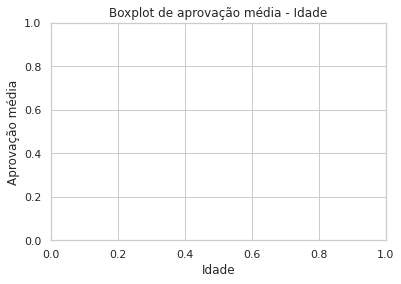

In [92]:
import matplotlib as mpl
x = df.groupby(['Matricula']).agg({'Matricula':'first','Idade Vest':'first','Aprovado':'mean','IAA Hist Sem':'mean','Etnia':'last','Situacao Aluno':'last','Periodo Vest':'first','Categoria de Ingresso':'first'})
#Histogramas
#g = sns.distplot(x['Idade Vest'],kde=False)
#g = sns.displot(x = x['Aprovado'],y = ['Idade Vest'])

#f, ax = plt.subplots(figsize=(7, 5))
#sns.despine(f)

#g = sns.histplot(hue = x['Idade Vest'],y = x['Aprovado'], palette="light:m_r",edgecolor=".3",linewidth=.5)

#ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
#ax.set_xticks([500, 1000, 2000, 5000, 10000])
#Boxplots
#x = df.groupby(['Matricula']).agg({'Matricula':'first','Aprovado':'mean','IAA Hist Sem':'last','Situacao Aluno':'last'})
#g = sns.boxplot(x = x['Categoria de Ingresso'],y = x['Aprovado'])

plt.Annotation
plt.xlabel('Idade')
plt.ylabel('Aprovação média')
plt.title('Boxplot de aprovação média - Idade')
#g.set_xticklabels(g.get_xticklabels(),rotation=90)

In [102]:
t = x.groupby('Idade Vest').agg({'Aprovado':'mean','IAA Hist Sem':'mean'}).reset_index()
t[t['Idade Vest']<22]['IAA Hist Sem'].mean()

6.023141485643704

In [105]:
df['Situacao Aluno'].unique()

array(['formado', 'abandono', 'regular'], dtype=object)

In [113]:
#x = df[df['Situacao Aluno'] =='formado']
x = df[df['Idade Vest']>=28]#[df['Idade Vest']<28]
x = x.groupby('Matricula').agg({'Situacao Aluno':'last'})
x['Situacao Aluno'].value_counts()
#x.groupby('Situacao Aluno').agg({'Matricula':'count'})

abandono    296
regular     197
formado     121
Name: Situacao Aluno, dtype: int64

In [15]:
import matplotlib as mpl
x = df.groupby(['Matricula']).agg({'Matricula':'first','Idade Vest':'first','Aprovado':'mean','IAA Hist Sem':'last','Etnia':'last','Situacao Aluno':'last','Periodo Vest':'first','Categoria de Ingresso':'first'})

No handles with labels found to put in legend.


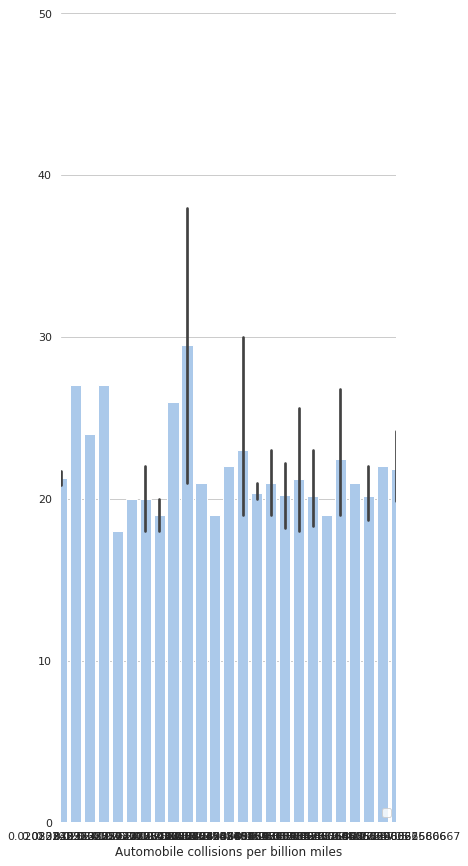

In [21]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
#crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="Aprovado", y="Idade Vest", data=x, color="b")

# Plot the crashes where alcohol was involved
#sns.set_color_codes("muted")
#sns.barplot(x="alcohol", y="abbrev", data=crashes,label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

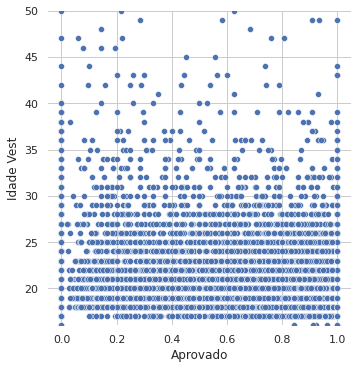

In [37]:
sns.set_theme(style="whitegrid")

# Load the example planets dataset
#planets = sns.load_dataset("planets")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=x,
    x="Aprovado", y="Idade Vest",
    palette=cmap, sizes=(10, 200),
)
#g.set(xscale="log", yscale="log")
plt.ylim([16, 50])

g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

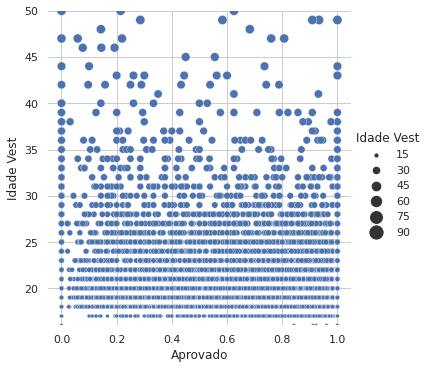

In [46]:
sns.set_theme(style="whitegrid")

# Load the example planets dataset
#planets = sns.load_dataset("planets")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=x,
    x="Aprovado", y="Idade Vest",size = 'Idade Vest',
    palette=cmap, sizes=(10, 200),
)
#g.set(xscale="log", yscale="log")
plt.ylim([16, 50])

g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

In [65]:
x[x['Idade Vest']<22].count()

Matricula                20043
Idade Vest               20043
Aprovado                 20043
IAA Hist Sem             20043
Etnia                    16771
Situacao Aluno           20043
Periodo Vest             20043
Categoria de Ingresso    10133
dtype: int64

In [69]:
20043/22083

0.9076212471131639

In [64]:
x[x['Idade Vest']>28].count()

Matricula                500
Idade Vest               500
Aprovado                 500
IAA Hist Sem             500
Etnia                    446
Situacao Aluno           500
Periodo Vest             500
Categoria de Ingresso    346
dtype: int64

In [63]:
t = x[x['Idade Vest']<28]
t[t['Idade Vest']>22].count()

Matricula                1540
Idade Vest               1540
Aprovado                 1540
IAA Hist Sem             1540
Etnia                    1391
Situacao Aluno           1540
Periodo Vest             1540
Categoria de Ingresso    1001
dtype: int64

No handles with labels found to put in legend.


(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

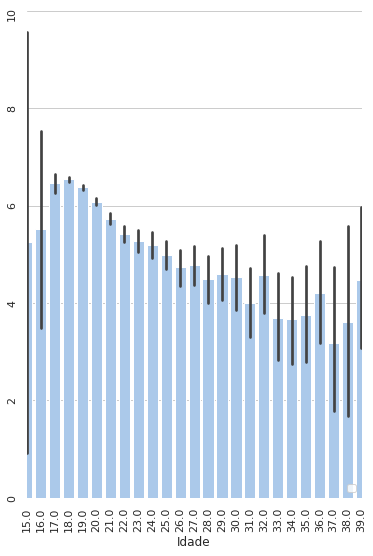

In [62]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 9))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="Idade Vest", y="IAA Hist Sem", data=x, color="b")

# Plot the crashes where alcohol was involved
#sns.set_color_codes("muted")
#sns.barplot(x="alcohol", y="abbrev", data=crashes,label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="", xlabel="Idade")
sns.despine(left=True, bottom=True)
plt.xticks(rotation='vertical')
plt.yticks(rotation='vertical')

### Tipo Currículo

In [213]:
x = df.groupby(['Matricula']).agg({'Matricula':'first','TipoCurriculo':'first','Idade Vest':'first','Aprovado':'mean','IAA Hist Sem':'last','Etnia':'last','Situacao Aluno':'last','Periodo Vest':'first','Categoria de Ingresso':'first'})
for i in df['TipoCurriculo'].unique():
    t = df[df['TipoCurriculo'] == i]
    print(i,t['Aprovado'].mean())

Ob 0.8229731106506023
Op 0.8759445273969504
Ex 0.7823411984160749
nan nan


In [215]:
df[~df['TipoCurriculo'].isna()]['Disciplina'].count()/ df['Disciplina'].count()

0.9980673213297276

Text(0.5, 1.0, 'Boxplot de aprovação média - Tipo de currículo')

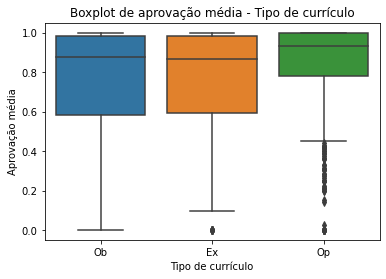

In [105]:
x = df.groupby(['Matricula']).agg({'Matricula':'first','TipoCurriculo':'first','Idade Vest':'first','Aprovado':'mean','IAA Hist Sem':'last','Etnia':'last','Situacao Aluno':'last','Periodo Vest':'first','Categoria de Ingresso':'first'})
#Histogramas
#g = sns.distplot(t[t['Categoria de Ingresso'] == 'Sim']['Aprovado'],kde=False)
#Boxplots
#x = df.groupby(['Matricula']).agg({'Matricula':'first','Aprovado':'mean','IAA Hist Sem':'last','Situacao Aluno':'last'})
g = sns.boxplot(x = x['TipoCurriculo'],y = x['Aprovado'])

plt.xlabel('Tipo de currículo')
plt.ylabel('Aprovação média')
plt.title('Boxplot de aprovação média - Tipo de currículo')
#g.set_xticklabels(g.get_xticklabels(),rotation=90)

### Vez

In [18]:
for i in df['vez'].unique():
    print(i,round(100*df[df['vez'] == i]['Aprovado'].mean()),round(100*df[df['vez']==i]['Disciplina'].count()/df['Disciplina'].count()),df[df['vez'] == i]['Nota'].mean())

0 89 87.0 7.147682088469906
1 41 8.0 4.068992944662352
2 25 2.0 2.9338105228516187
3 18 1.0 2.2958194328607173
7 7 0.0 1.1199021207177815
5 11 0.0 1.506070143884892
6 11 0.0 1.4397071490094746
4 14 0.0 1.8929459642776396
8 7 0.0 1.0338709677419355
9 5 0.0 0.78125
10 4 0.0 0.8809523809523809
14 25 0.0 1.75
12 7 0.0 1.0
15 0 0.0 1.0
11 6 0.0 1.0277777777777777
13 0 0.0 2.25


No handles with labels found to put in legend.


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

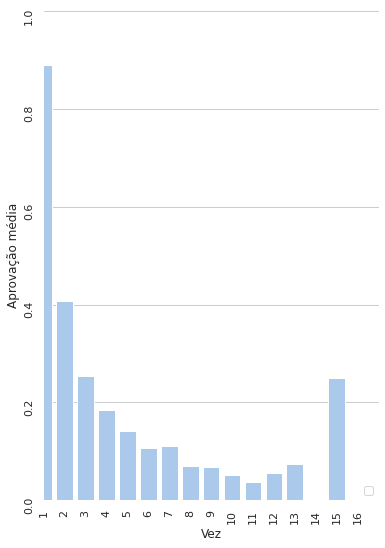

In [16]:
x = df.groupby(['vez']).agg({'Matricula':'first','TipoCurriculo':'first','Idade Vest':'first','Aprovado':'mean','IAA Hist Sem':'last','Etnia':'last','Situacao Aluno':'last','Periodo Vest':'first','Categoria de Ingresso':'first'})
sns.set_theme(style="whitegrid")
x.reset_index(inplace=True)
x['vez'] = x['vez'].apply(lambda x: x+1)
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 9))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="vez", y="Aprovado", data=x, color="b")

# Plot the crashes where alcohol was involved
#sns.set_color_codes("muted")
#sns.barplot(x="alcohol", y="abbrev", data=crashes,label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 16),ylim=(0,1), ylabel="Aprovação média", xlabel="Vez")
sns.despine(left=True, bottom=True)
plt.xticks(rotation='vertical')
plt.yticks(rotation='vertical')

In [22]:
d = df[df['Matricula'] == 4241266]
d[d['Semestre Historico'] == 20071]

,Matricula,Semestre Historico,Matricula Professor,Disciplina,Periodo Vest,CPF,Sexo,Curso,Nome Curso,Pontos Vest,...,Aprovado,vez,Cont Disc,Aprov Disc,Aprov Aluno,Aprov Prof,Aprov -3,Aprov -1,IAA Sem,IAA Hist Sem
255141,4241266,20071,31733.0,EEL7846,20042,1.013112e+09,M,202,ENGENHARIA ELÉTRICA,6042.0,...,1,0,14,0.982143,0.976744,1.000000,1.0,1.0,8.084906,7.531977
255142,4241266,20071,31733.0,EEL7810,20042,1.013112e+09,M,202,ENGENHARIA ELÉTRICA,6042.0,...,1,0,14,0.976821,0.976744,1.000000,1.0,1.0,8.084906,7.531977
255143,4241266,20071,39432.0,EPS5209,20042,1.013112e+09,M,202,ENGENHARIA ELÉTRICA,6042.0,...,1,0,14,0.971560,0.976744,0.970619,1.0,1.0,8.084906,7.531977
255144,4241266,20071,45041.0,EEL7847,20042,1.013112e+09,M,202,ENGENHARIA ELÉTRICA,6042.0,...,1,0,14,1.000000,0.976744,1.000000,1.0,1.0,8.084906,7.531977
255145,4241266,20071,46790.0,EEL7203,20042,1.013112e+09,M,202,ENGENHARIA ELÉTRICA,6042.0,...,1,0,14,0.931034,0.976744,0.931034,1.0,1.0,8.084906,7.531977
255146,4241266,20071,50576.0,EEL7836,20042,1.013112e+09,M,202,ENGENHARIA ELÉTRICA,6042.0,...,1,0,14,0.980769,0.976744,0.985185,1.0,1.0,8.084906,7.531977
255147,4241266,20071,51190.0,EFC5801,20042,1.013112e+09,M,202,ENGENHARIA ELÉTRICA,6042.0,...,1,0,14,0.913495,0.976744,0.902439,1.0,1.0,8.084906,7.531977
255148,4241266,20071,54806.0,EEL7815,20042,1.013112e+09,M,202,ENGENHARIA ELÉTRICA,6042.0,...,1,0,14,0.950000,0.976744,0.941176,1.0,1.0,8.084906,7.531977
255149,4241266,20071,70615.0,EEL7403,20042,1.013112e+09,M,202,ENGENHARIA ELÉTRICA,6042.0,...,1,0,14,0.876623,0.976744,0.848214,1.0,1.0,8.084906,7.531977
255150,4241266,20071,73932.0,EMC5125,20042,1.013112e+09,M,202,ENGENHARIA ELÉTRICA,6042.0,...,1,0,14,0.816895,0.976744,0.691489,1.0,1.0,8.084906,7.531977


In [20]:
df[df['Cont Disc'] == 14]

,Matricula,Semestre Historico,Matricula Professor,Disciplina,Periodo Vest,CPF,Sexo,Curso,Nome Curso,Pontos Vest,...,Aprovado,vez,Cont Disc,Aprov Disc,Aprov Aluno,Aprov Prof,Aprov -3,Aprov -1,IAA Sem,IAA Hist Sem
255141,4241266,20071,31733.0,EEL7846,20042,1.013112e+09,M,202,ENGENHARIA ELÉTRICA,6042.0,...,1,0,14,0.982143,0.976744,1.000000,1.0,1.0,8.084906,7.531977
255142,4241266,20071,31733.0,EEL7810,20042,1.013112e+09,M,202,ENGENHARIA ELÉTRICA,6042.0,...,1,0,14,0.976821,0.976744,1.000000,1.0,1.0,8.084906,7.531977
255143,4241266,20071,39432.0,EPS5209,20042,1.013112e+09,M,202,ENGENHARIA ELÉTRICA,6042.0,...,1,0,14,0.971560,0.976744,0.970619,1.0,1.0,8.084906,7.531977
255144,4241266,20071,45041.0,EEL7847,20042,1.013112e+09,M,202,ENGENHARIA ELÉTRICA,6042.0,...,1,0,14,1.000000,0.976744,1.000000,1.0,1.0,8.084906,7.531977
255145,4241266,20071,46790.0,EEL7203,20042,1.013112e+09,M,202,ENGENHARIA ELÉTRICA,6042.0,...,1,0,14,0.931034,0.976744,0.931034,1.0,1.0,8.084906,7.531977
255146,4241266,20071,50576.0,EEL7836,20042,1.013112e+09,M,202,ENGENHARIA ELÉTRICA,6042.0,...,1,0,14,0.980769,0.976744,0.985185,1.0,1.0,8.084906,7.531977
255147,4241266,20071,51190.0,EFC5801,20042,1.013112e+09,M,202,ENGENHARIA ELÉTRICA,6042.0,...,1,0,14,0.913495,0.976744,0.902439,1.0,1.0,8.084906,7.531977
255148,4241266,20071,54806.0,EEL7815,20042,1.013112e+09,M,202,ENGENHARIA ELÉTRICA,6042.0,...,1,0,14,0.950000,0.976744,0.941176,1.0,1.0,8.084906,7.531977
255149,4241266,20071,70615.0,EEL7403,20042,1.013112e+09,M,202,ENGENHARIA ELÉTRICA,6042.0,...,1,0,14,0.876623,0.976744,0.848214,1.0,1.0,8.084906,7.531977
255150,4241266,20071,73932.0,EMC5125,20042,1.013112e+09,M,202,ENGENHARIA ELÉTRICA,6042.0,...,1,0,14,0.816895,0.976744,0.691489,1.0,1.0,8.084906,7.531977


### Contagem Disciplinas

In [56]:
df[df['Cont Disc'] == 9].count()

Matricula                24525
Semestre Historico       24525
Matricula Professor      23641
Disciplina               24525
Periodo Vest             24525
CPF                      24084
Sexo                     24525
Curso                    24525
Nome Curso               24525
Pontos Vest              23886
Ano Vest                 23211
Estado EM                23355
Idade Vest               23211
Etnia                    18360
Categoria de Ingresso     5463
Nota                     24525
Horas Aula               24525
Frequencia               24525
TipoCurriculo            24498
Revalida                     0
Turma                    24470
Situacao Aluno           24525
Aprovado                 24525
vez                      24525
Cont Disc                24525
Aprov Disc               24525
Aprov Aluno              24525
Aprov Prof               23641
Aprov -3                 22779
Aprov -1                 24525
IAA Sem                  24525
IAA Hist Sem             24525
dtype: i

No handles with labels found to put in legend.


(array([ 0.,  2.,  4.,  6.,  8., 10.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

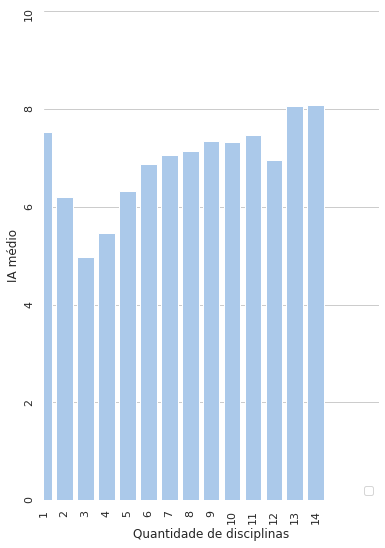

In [73]:
x = df.groupby(['Cont Disc']).agg({'Matricula':'first','TipoCurriculo':'first','Idade Vest':'first','Aprovado':'mean','IAA Hist Sem':'last','Etnia':'last','Situacao Aluno':'last','IAA Sem':'mean','Periodo Vest':'first','Nota':'mean','Categoria de Ingresso':'first'})
sns.set_theme(style="whitegrid")
x.reset_index(inplace=True)
#x['vez'] = x['vez'].apply(lambda x: x+1)
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 9))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="Cont Disc", y="IAA Sem", data=x, color="b")

# Plot the crashes where alcohol was involved
#sns.set_color_codes("muted")
#sns.barplot(x="alcohol", y="abbrev", data=crashes,label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 16),ylim=(0,10), ylabel="IA médio", xlabel="Quantidade de disciplinas")
sns.despine(left=True, bottom=True)
plt.xticks(rotation='vertical')
plt.yticks(rotation='vertical')

No handles with labels found to put in legend.


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

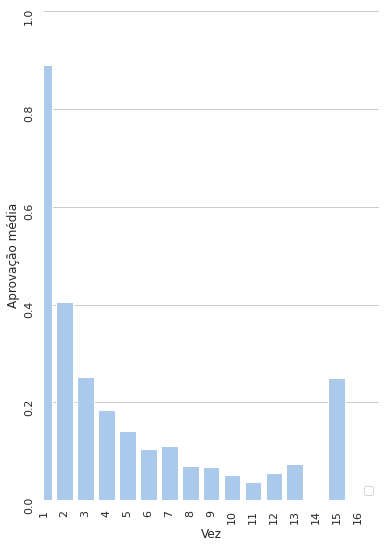

In [57]:
x = df.groupby(['vez']).agg({'Matricula':'first','TipoCurriculo':'first','Idade Vest':'first','Aprovado':'mean','IAA Hist Sem':'last','Etnia':'last','Situacao Aluno':'last','Periodo Vest':'first','Categoria de Ingresso':'first'})
sns.set_theme(style="whitegrid")
x.reset_index(inplace=True)
x['vez'] = x['vez'].apply(lambda x: x+1)
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 9))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="vez", y="Aprovado", data=x, color="b")

# Plot the crashes where alcohol was involved
#sns.set_color_codes("muted")
#sns.barplot(x="alcohol", y="abbrev", data=crashes,label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 16),ylim=(0,1), ylabel="Aprovação média", xlabel="Vez")
sns.despine(left=True, bottom=True)
plt.xticks(rotation='vertical')
plt.yticks(rotation='vertical')

In [35]:
df['Revalida'].value_counts()

Series([], Name: Revalida, dtype: int64)

In [259]:
x = df[df['Revalida'].isna()]
x[x['Cont Disc'] == 62]

,Matricula,Semestre Historico,Matricula Professor,Disciplina,Periodo Vest,CPF,Sexo,Curso,Nome Curso,Pontos Vest,...,Aprovado,vez,Cont Disc,Aprov Disc,Aprov Aluno,Aprov Prof,Aprov -3,Aprov -1,IAA Sem,IAA Hist Sem
338153,5242185,20051,NaN,EPS5227,20052,9.735691e+10,M,212,ENGENHARIA DE PRODUÇÃO CIVIL,NaN,...,1,0,62,0.959732,1.0,NaN,1.0,1.0,7.359438,7.359438


In [263]:
x = df[df['Semestre Historico']==20051]
x[x['Matricula'] == 5242185]['Disciplina'].unique()


array(['ECV5228', 'ECV5231', 'ECV5319', 'ECV5330', 'ECV5331', 'ECZ5102',
       'EEL7020', 'EGR5212', 'EGR5604', 'EGR5621', 'EMC5425', 'ENS5101',
       'ENS5102', 'ENS5106', 'ENS5107', 'EPS5113', 'EPS5120', 'ECV5224',
       'ECV5223', 'ECV5143', 'ARQ5115', 'ECV5104', 'ECV5114', 'ECV5115',
       'ECV5119', 'ECV5136', 'ECV5137', 'ECV5139', 'ECV5215', 'EPS5222',
       'EPS5223', 'EPS5225', 'FSC5101', 'FSC5122', 'FSC5123', 'FSC5132',
       'FSC5133', 'EQA5114', 'FSC5207', 'MTM5161', 'MTM5162', 'MTM5163',
       'MTM5245', 'MTM5512', 'QMC5105', 'INE5202', 'EPS7004', 'EPS5227',
       'EPS5228', 'EPS5229', 'EPS5230', 'EPS5231', 'EPS5232', 'EPS7003',
       'EPS5235', 'EPS5238', 'EPS5311', 'EPS5312', 'EPS5505', 'EPS7001',
       'EPS7002', 'EPS5237'], dtype=object)

In [74]:
x

,Cont Disc,Matricula,TipoCurriculo,Idade Vest,Aprovado,IAA Hist Sem,Etnia,Situacao Aluno,IAA Sem,Periodo Vest,Nota,Categoria de Ingresso
0,1,130001,Ob,19.0,0.850908,5.680000,branca,formado,7.518058,20001,7.518628,Classificação geral
1,2,130214,Ob,18.0,0.696742,7.227642,branca,formado,6.191850,20001,6.139475,Classificação geral
2,3,130125,Op,18.0,0.591859,2.857143,branca,abandono,4.978571,20001,4.987274,Classificação geral
3,4,130010,Ob,18.0,0.666763,4.606557,branca,formado,5.456454,20001,5.505997,Classificação geral
4,5,130010,Ob,18.0,0.783805,4.724806,branca,formado,6.316793,20001,6.390816,Classificação geral
5,6,130001,Ob,19.0,0.855022,5.122159,branca,formado,6.866384,20001,6.931763,Classificação geral
6,7,130001,Ob,19.0,0.882495,5.323077,branca,formado,7.068019,20001,7.130629,Classificação geral
7,8,130001,Ob,19.0,0.893546,5.173820,branca,formado,7.144729,20001,7.219065,Classificação geral
8,9,130010,Ob,18.0,0.916004,6.755747,branca,formado,7.335227,20001,7.381121,Classificação geral
9,10,130028,Ob,16.0,0.915301,6.966887,branca,formado,7.331534,20001,7.355829,Classificação geral


In [91]:
x = df.groupby(['Disciplina']).agg({'Matricula':'first','TipoCurriculo':'first','Idade Vest':'first','Aprovado':'mean','IAA Hist Sem':'last','Etnia':'last','Situacao Aluno':'last','IAA Sem':'mean','Periodo Vest':'first','Nota':'mean','Categoria de Ingresso':'first'})
x[x['Nota']<4][x['Nota']>-1]['Nota'].mean()


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


1.3065508432701674

In [60]:
for i in x['Cont Disc'].unique():
    print(i,round(100*x[x['Cont Disc'] == i]['Aprovado'].mean()),round(100*x[x['Cont Disc']==i]['Disciplina'].count()/x['Disciplina'].count()),x[x['Cont Disc'] == i]['Nota'].mean())

KeyError: 'Disciplina'

In [59]:
for i in x['Cont Disc'].unique():
    print(i,round(100*x[x['Cont Disc'] == i]['Aprovado'].mean()),x[x['vez']==i]['Disciplina'].count()/x['Disciplina'].count(),x[x['Cont Disc'] == i]['Nota'].mean())

KeyError: 'vez'

In [272]:
x[x['Cont Disc'] ==9]['Aprovado'].mean()

0.9149590163934426

In [248]:
df[df['Cont Disc'] >10][df['Semestre Historico'] == 20182].value_counts()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Series([], dtype: int64)

In [265]:
df[df['Cont Disc'] >10][df['Semestre Historico'] == ].value_counts()

SyntaxError: invalid syntax (<ipython-input-265-9423319dba18>, line 1)

In [267]:
x['Cont Disc'].value_counts()

6     8219
7     5802
5     4822
8     2824
4     1644
9      976
3      793
2      338
10     297
1      244
21      63
62      62
27      54
48      48
12      35
11      33
33      33
16      32
31      31
15      30
30      30
13      26
22      22
19      19
18      18
14      14
Name: Cont Disc, dtype: int64

In [47]:
df.columns

Index(['Matricula', 'Semestre Historico', 'Matricula Professor', 'Disciplina',
       'Periodo Vest', 'CPF', 'Sexo', 'Curso', 'Nome Curso', 'Pontos Vest',
       'Ano Vest', 'Estado EM', 'Idade Vest', 'Etnia', 'Categoria de Ingresso',
       'Nota', 'Horas Aula', 'Frequencia', 'TipoCurriculo', 'Revalida',
       'Turma', 'Situacao Aluno', 'Aprovado', 'vez', 'Cont Disc', 'Aprov Disc',
       'Aprov Aluno', 'Aprov Prof', 'Aprov -3', 'Aprov -1', 'IAA Sem',
       'IAA Hist Sem'],
      dtype='object')

### Disciplinas

In [83]:
df['TipoCurriculo'].unique()


array(['Ob', 'Op', nan], dtype=object)

Text(0.5, 1.0, 'Histograma de aprovação média por disciplina')

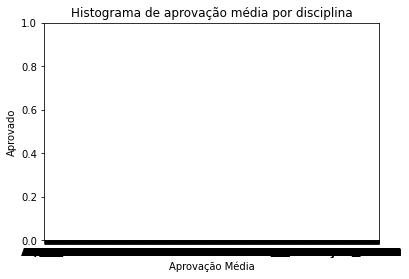

In [87]:
x = df.groupby(['Disciplina']).agg({'Matricula':'count','TipoCurriculo':'first','Aprovado':'mean','IAA Hist Sem':'last','Etnia':'last','Situacao Aluno':'last','Periodo Vest':'first','Categoria de Ingresso':'first'})

#Histogramas
#g = sns.distplot(x['Aprovado'],kde=False)
#Boxplots
#x = df.groupby(['Matricula']).agg({'Matricula':'first','Aprovado':'mean','IAA Hist Sem':'last','Situacao Aluno':'last'})
g = sns.boxplot(x = x.reset_index()['Disciplina'],y = x['Aprovado'])

plt.xlabel('Aprovação Média')
#plt.ylabel('Aprovação média')
plt.title('Histograma de aprovação média por disciplina')
#g.set_xticklabels(g.get_xticklabels(),rotation=90)

Text(0.5, 1.0, 'Histograma de nota média por disciplina')

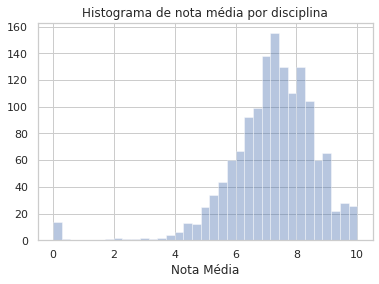

In [41]:
x = df.groupby(['Disciplina']).agg({'Matricula':'count','Nota':'mean','Matricula Professor':'first','TipoCurriculo':'first','Aprovado':'mean','IAA Hist Sem':'last','Etnia':'last','Situacao Aluno':'last','Periodo Vest':'first','Categoria de Ingresso':'first'})

#Histogramas
g = sns.distplot(x['Nota'],kde=False)
#Boxplots
#x = df.groupby(['Matricula']).agg({'Matricula':'first','Aprovado':'mean','IAA Hist Sem':'last','Situacao Aluno':'last'})
#g = sns.boxplot(x = x.reset_index()['Disciplina'],y = x['Aprovado'])

plt.xlabel('Nota Média')
#plt.ylabel('Aprovação média')
plt.title('Histograma de nota média por disciplina')
#g.set_xticklabels(g.get_xticklabels(),rotation=90)

In [84]:
x[x['Aprovado']<0.2]

,Matricula,TipoCurriculo,Aprovado,IAA Hist Sem,Etnia,Situacao Aluno,Periodo Vest,Categoria de Ingresso
Disciplina,,,,,,,,
ANT5203,1,NaN,0.0,6.304348,NaN,abandono,19991,NaN
CCN5116,5,Op,0.0,2.740260,branca,abandono,20002,NaN
CNM7210,1,Ob,0.0,1.633929,preta,abandono,20142,Negro
DIR5105,1,NaN,0.0,3.111111,NaN,abandono,19992,NaN
DIR5115,1,NaN,0.0,3.318750,NaN,abandono,19962,NaN
EGR5053,1,Ob,0.0,4.228788,branca,formado,20102,Escola Pública
FSC5107,1,Ob,0.0,2.619565,preta,abandono,20111,Negro
FSC5909,1,Ob,0.0,6.445946,branca,regular,20141,"PAA - Escola Pública - Renda até 1,5 Salário M..."
LLV5801,1,NaN,0.0,0.000000,NaN,abandono,19941,NaN


### Professores

In [42]:
x.count()

Matricula                2115
Nota                     2115
TipoCurriculo            2096
Aprovado                 2115
IAA Hist Sem             2115
Etnia                    2090
Situacao Aluno           2115
Periodo Vest             2115
Categoria de Ingresso    1617
dtype: int64

In [61]:
379/2115

0.17919621749408984

In [60]:
t = x[x['Nota']>=8]
t[t['Nota']<=10]['Nota'].count()

379

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histograma de nota média por professor')

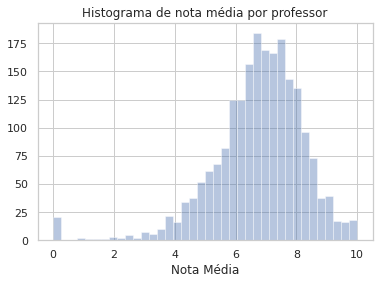

In [36]:
x = df.groupby(['Matricula Professor']).agg({'Matricula':'count','Nota':'mean','TipoCurriculo':'first','Nota':'mean','Aprovado':'mean','IAA Hist Sem':'last','Etnia':'last','Situacao Aluno':'last','Periodo Vest':'first','Categoria de Ingresso':'first'})

#Histogramas
g = sns.distplot(x['Nota'],kde=False)
#Boxplots
#x = df.groupby(['Matricula']).agg({'Matricula':'first','Aprovado':'mean','IAA Hist Sem':'last','Situacao Aluno':'last'})
#g = sns.boxplot(x = x.reset_index()['Disciplina'],y = x['Aprovado'])

plt.xlabel('Nota Média')
#plt.ylabel('Aprovação média')
plt.title('Histograma de nota média por professor')
#g.set_xticklabels(g.get_xticklabels(),rotation=90)

In [44]:
x = df.groupby(['Matricula Professor']).agg({'Matricula':'count','Nota':'mean','Matricula Professor':'first','TipoCurriculo':'first','Aprovado':'mean','IAA Hist Sem':'last','Etnia':'last','Situacao Aluno':'last','Periodo Vest':'first','Categoria de Ingresso':'first'})
x.count()

Matricula                2115
Nota                     2115
Matricula Professor      2115
TipoCurriculo            2096
Aprovado                 2115
IAA Hist Sem             2115
Etnia                    2090
Situacao Aluno           2115
Periodo Vest             2115
Categoria de Ingresso    1617
dtype: int64

In [47]:
t = x[x['Nota'] == 0]
t[t['Matricula'] > 1]

,Matricula,Nota,Matricula Professor,TipoCurriculo,Aprovado,IAA Hist Sem,Etnia,Situacao Aluno,Periodo Vest,Categoria de Ingresso
Matricula Professor,,,,,,,,,,
546270.0,2,0.0,546270.0,Op,0.0,6.801887,branca,formado,20072,Classificação geral


In [95]:
x = df.groupby(['Disciplina','Matricula Professor']).agg({'Matricula':'count','Disciplina':'first','Matricula Professor':'first','TipoCurriculo':'first','Aprovado':'mean','IAA Hist Sem':'last','Etnia':'last','Situacao Aluno':'last','Periodo Vest':'first','Categoria de Ingresso':'first'})
#x = x.groupby(['Disciplina']).agg({'Matricula':'count','TipoCurriculo':'first','Aprovado':'mean','IAA Hist Sem':'last','Etnia':'last','Situacao Aluno':'last','Periodo Vest':'first','Categoria de Ingresso':'first'})
x.sample(4)

,,Matricula,Disciplina,Matricula Professor,TipoCurriculo,Aprovado,IAA Hist Sem,Etnia,Situacao Aluno,Periodo Vest,Categoria de Ingresso
Disciplina,Matricula Professor,,,,,,,,,,
EQA5342,541286.0,59,EQA5342,541286.0,Ob,0.898305,2.188679,parda,formado,20021,Negro
ARQ5683,63198.0,12,ARQ5683,63198.0,Op,1.000000,9.140127,parda,regular,20032,Classificação geral
ARQ5617,527429.0,102,ARQ5617,527429.0,Ob,0.980392,3.745949,branca,abandono,20001,NaN
EGR5616,33477.0,16,EGR5616,33477.0,Ob,0.937500,3.391304,branca,formado,20001,NaN


### Histórico

[Text(0, 0, '20001'),
 Text(1, 0, '20002'),
 Text(2, 0, '20011'),
 Text(3, 0, '20012'),
 Text(4, 0, '20021'),
 Text(5, 0, '20022'),
 Text(6, 0, '20031'),
 Text(7, 0, '20032'),
 Text(8, 0, '20041'),
 Text(9, 0, '20042'),
 Text(10, 0, '20051'),
 Text(11, 0, '20052'),
 Text(12, 0, '20061'),
 Text(13, 0, '20062'),
 Text(14, 0, '20071'),
 Text(15, 0, '20072'),
 Text(16, 0, '20081'),
 Text(17, 0, '20082'),
 Text(18, 0, '20091'),
 Text(19, 0, '20092'),
 Text(20, 0, '20101'),
 Text(21, 0, '20102'),
 Text(22, 0, '20111'),
 Text(23, 0, '20112'),
 Text(24, 0, '20121'),
 Text(25, 0, '20122'),
 Text(26, 0, '20131'),
 Text(27, 0, '20132'),
 Text(28, 0, '20141'),
 Text(29, 0, '20142'),
 Text(30, 0, '20151'),
 Text(31, 0, '20152'),
 Text(32, 0, '20161'),
 Text(33, 0, '20162'),
 Text(34, 0, '20171'),
 Text(35, 0, '20172'),
 Text(36, 0, '20181'),
 Text(37, 0, '20182')]

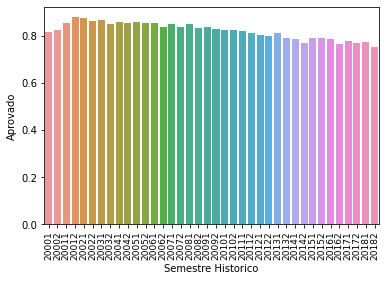

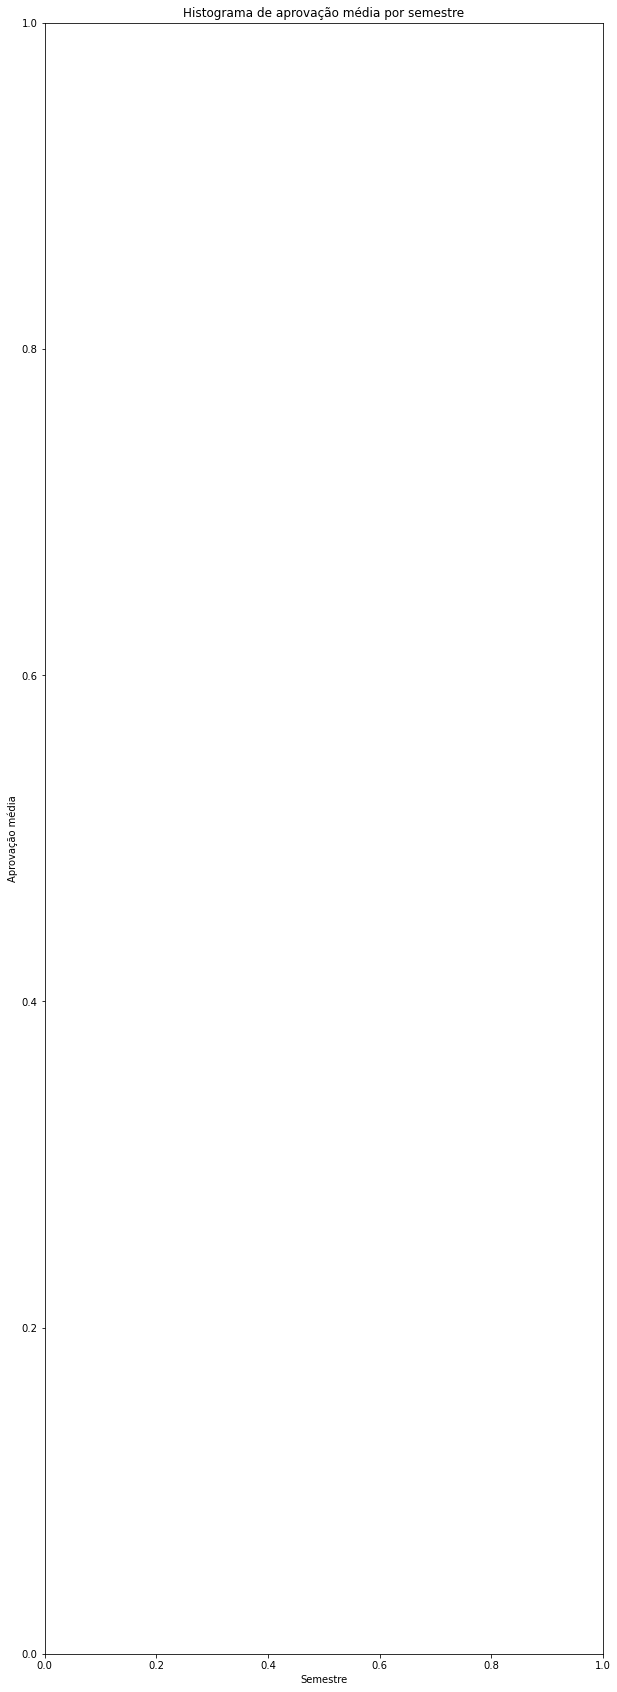

In [123]:
#df[df['Semestre Historico']]
x = df.groupby(['Semestre Historico']).agg({'Matricula':'count','Matricula Professor':'first','TipoCurriculo':'first','Aprovado':'mean','IAA Hist Sem':'last','Etnia':'last','Situacao Aluno':'last','Periodo Vest':'first','Categoria de Ingresso':'first'})
x = x.reset_index()
x = x[x['Semestre Historico']!=20191]
#Histogramas
#g = sns.distplot(x['Aprovado'],kde=False)
g = sns.barplot(x='Semestre Historico',y='Aprovado',data=x)
#Boxplots
#x = df.groupby(['Matricula']).agg({'Matricula':'first','Aprovado':'mean','IAA Hist Sem':'last','Situacao Aluno':'last'})
#g = sns.boxplot(x = x.reset_index()['Disciplina'],y = x['Aprovado'])
plt.figure(figsize=(10,30)) 


plt.xlabel('Semestre')
plt.ylabel('Aprovação média')
plt.title('Histograma de aprovação média por semestre')
g.set_xticklabels(g.get_xticklabels(),fontsize=9,rotation=90)

In [118]:
df = df[df['Semestre Historico'] %10 !=3]

array([20001, 20002, 20011, 20012, 20013, 20021, 20022, 20023, 20031,
       20032, 20033, 20041, 20042, 20043, 20051, 20052, 20053, 20061,
       20062, 20063, 20071, 20072, 20073, 20081, 20082, 20083, 20092,
       20093, 20101, 20102, 20103, 20111, 20112, 20113, 20121, 20122,
       20123, 20131, 20132, 20133, 20141, 20142, 20143, 20151, 20152,
       20153, 20161, 20162, 20163, 20171, 20172, 20173, 20181, 20182,
       20183, 20191])

branca           7239
parda             402
amarela           177
preta              31
não declarada      11
indígena            2
Name: Etnia, dtype: int64

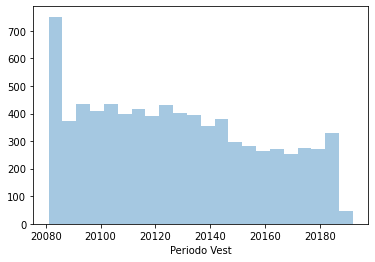

In [105]:
x = df.groupby(['Matricula']).agg({'Matricula':'first','Aprovado':'mean','IAA Hist Sem':'last','Etnia':'last','Periodo Vest':'first','Categoria de Ingresso':'first'})
lis = x['Categoria de Ingresso'].unique()
x['Categoria de Ingresso'] = x['Categoria de Ingresso'].apply(lambda x:'Não' if x == 'Classificação geral' else 'Sim' )


g = sns.distplot(x[x['Categoria de Ingresso']=='Não']['Periodo Vest'],kde=False)

x[x['Categoria de Ingresso']=='Não']['Etnia'].value_counts()
#x[x['Categoria de Ingresso']=='Sim'].count()
#g = sns.barplot(x = x['Categoria de Ingresso'],y = x['Matricula'].count())

In [106]:
x[x['Categoria de Ingresso']=='Sim']['Etnia'].value_counts()

branca           10721
parda             1290
preta              762
amarela            259
indígena            45
não declarada       12
Name: Etnia, dtype: int64

In [ ]:
~